In [1]:
pwd

'/data2/mito_lineage/src/vireo'

In [2]:
import os
os.chdir("/data2/mito_lineage/Analysis/multiplex")


In [3]:
pwd

'/data2/mito_lineage/Analysis/multiplex'

In [4]:
INDIR="data/CHIP_april08_2021/MTblacklist/chrM/pseudo/minC200_minAF0.01/numC100000_ispropFalse/"
#INDIR="data/jan21_2021/chrM/pseudo/minC200_minAF0.01/numC25000_ispropFalse"
OUTDIR= "data/CHIP_april08_2021/MTblacklist/chrM/pseudo/minC200_minAF0.01/numC100000_ispropFalse/variants"
N_DONORS=5 
vars_to_plot=50
#INDIR=""
sample_names="Control,Flt3l,Input"

In [5]:
out_f = os.path.join(OUTDIR, f"variants_violin_top{vars_to_plot}")

In [6]:
sample_names = {ind:val for ind,val in enumerate(sample_names.split(","))}
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)

In [7]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

from src.external.pyvenn import venn

%load_ext autoreload
%autoreload 2
import src.utils.variant_utils as vu

0.4.2


In [8]:
def filt_high(df, thresh):
    return df.loc[(df.mean(axis=1)<thresh)].index.values


## Load and clean variants vcf

In [9]:
vcf = pd.read_csv(join(INDIR, "cellSNP.base.vcf"),sep='\t')
vcf_samp_dict = {}
for s in sample_names:
    col = vcf.columns.values[vcf.columns.str.contains(sample_names[s])]
    vcf_samp_dict[col[0]]=sample_names[s]
vcf=vcf.rename(vcf_samp_dict, axis=1)
vcf

,#CHROM,POS,ID_x,REF_x,ALT,QUAL_x,FILTER_x,INFO_x,Control,ID_y,...,FILTER_y,INFO_y,Flt3l,ID,REF,QUAL,FILTER,INFO,Input,new ID
0,chrM,73,.,G,A,.,PASS,AD=200873;DP=565833;OTH=401,1.0,.,...,PASS,AD=448186;DP=1222674;OTH=761,1.0,.,G,.,PASS,AD=352138;DP=758275;OTH=736,1.0,1
1,chrM,150,.,C,T,.,PASS,AD=69061;DP=209318;OTH=176,2.0,.,...,PASS,AD=82637;DP=549107;OTH=508,2.0,.,C,.,PASS,AD=83010;DP=398760;OTH=383,2.0,2
2,chrM,195,.,T,C,.,PASS,AD=8037;DP=155823;OTH=229,3.0,.,...,PASS,AD=110292;DP=435179;OTH=506,3.0,.,T,.,PASS,AD=59965;DP=346662;OTH=574,3.0,3
3,chrM,248,.,A,G,.,PASS,AD=1571;DP=140842;OTH=523,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,chrM,277,.,C,A,.,PASS,AD=4635;DP=371845;OTH=216,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,chrM,13435,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,.,C,.,PASS,AD=9137;DP=818137;OTH=417,143.0,213
213,chrM,13814,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,.,T,.,PASS,AD=8436;DP=758090;OTH=3422,162.0,214
214,chrM,13823,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,.,T,.,PASS,AD=8420;DP=799780;OTH=3147,165.0,215
215,chrM,14047,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,.,A,.,PASS,AD=9533;DP=840758;OTH=11706,166.0,216


## Get overlap variants based on the vireo algorithm

## Plot

In [10]:
samples = list(sample_names.values())
variant_overlaps=dict()
for s in samples:
    variant_overlaps[s] = set(vcf[s].loc[(~(vcf[s].isnull()))].index.values)
variant_overlaps

{'Control': {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d2c4ea898>)

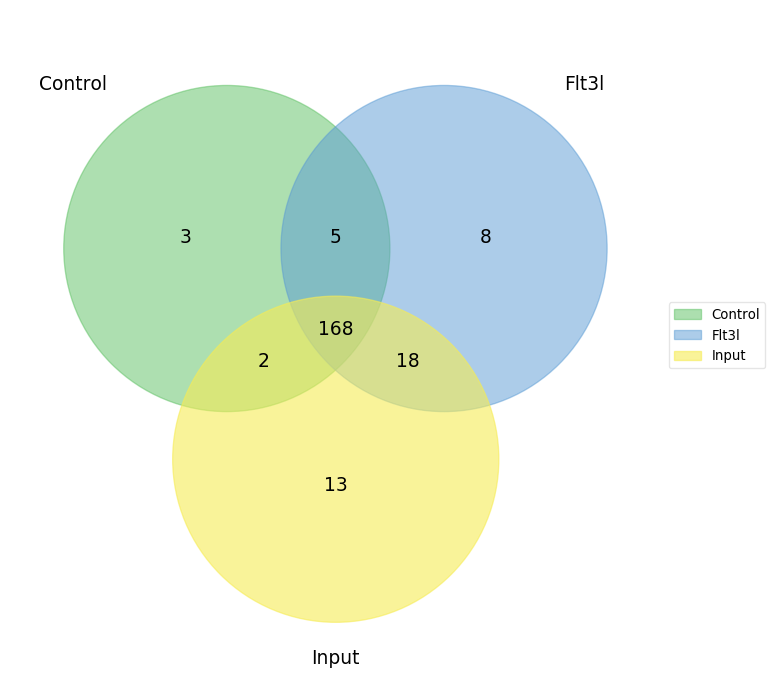

In [11]:
%matplotlib inline
labels=venn.get_labels(list(variant_overlaps.values()))
venn.venn3(labels=labels ,names=samples)

## Break it up by donor

In [12]:
def extract_variants_per_donor(af, cell_meta, af_thresh=0, cells_thresh=1):
    af = af>af_thresh
    samps = set(cell_meta.values)
    variants_dict = {}
    for s in samps:
        print(af.loc[(af.loc[:,cell_meta[cell_meta==s].index.astype(object)]>af_thresh).any(axis=1)].index)
        variants_dict[s] =  af.loc[(af.loc[:,cell_meta[cell_meta==s].index.astype(object)]>af_thresh).any(axis=1)].index
    return variants_dict

In [13]:
af_thresh=0.1

## Boxplot for each variant

In [14]:
curr_ad_f = join(INDIR, f"cellSNP.tag.AD.mtx")
curr_dp_f = join(INDIR, f"cellSNP.tag.DP.mtx")
curr_ad = mmread(curr_ad_f).tocsc()
curr_dp = mmread(curr_dp_f).tocsc()
AD_df = pd.DataFrame(curr_ad.todense())
DP_df = pd.DataFrame(curr_dp.todense())
DP_df.index.name = "Variant"
DP_df.columns.name = "Cell"
AD_df.index.name = "Variant"
AD_df.columns.name = "Cell"
AF_df = AD_df/(DP_df+0.001)



In [15]:
donors_d = {}
samples_d = {}
#n_clone_list = [7]#[2,3,4,5,6,7]
all_variants_dict = {}

high_vars = [] #remove the high freq variants
high_vars_l = []
for n in range(N_DONORS):
#     curr_ad_f = join(INDIR, f"cluster{n}.AD.txt")
#     curr_dp_f = join(INDIR, f"cluster{n}.DP.txt")
    curr_ad_f = join(INDIR, f"donor{n}.AD.mtx")
    curr_dp_f = join(INDIR, f"donor{n}.DP.mtx")
    curr_ad = mmread(curr_ad_f).tocsc()
    curr_dp = mmread(curr_dp_f).tocsc()
    curr_ad = pd.DataFrame(curr_ad.todense())
    curr_dp = pd.DataFrame(curr_dp.todense())
    curr_dp.index.name = "Variant"
    curr_dp.columns.name = "Cell"
    curr_ad.index.name = "Variant"
    curr_ad.columns.name = "Cell"
    curr_af = curr_ad/(curr_dp+0.001)
    curr_labels = pd.read_csv(join(INDIR, f"donor{n}.labels.txt"), index_col=0)
    for _ , val in curr_labels.iterrows():
        samples_d[val['index']] = val['sample ID']
    
    print("number of labels from this donor")
    print(len(curr_labels['index'].values))
    for i in curr_labels['index'].values: 
        donors_d[i] = n
        
    high_vars+=(list(filt_high(curr_af, thresh=0.8)))
    high_vars_l.append(set(filt_high(curr_af, thresh=0.8)))
    
#high_vars=set(high_vars)
high_vars

number of labels from this donor
1002
number of labels from this donor
1165
number of labels from this donor
948
number of labels from this donor
1192
number of labels from this donor
1470


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,

In [16]:
curr_af

Cell,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Variant,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.017042,0.000000,0.000000,0.000000,0.006226,0.000000,0.000000,0.001771,...,0.001250,0.004270,0.009060,0.000000,0.001767,0.000000,0.007583,0.004826,0.001633,0.001542
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002920,0.025429,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.009479,0.000000,0.000000,0.000000,0.006944,0.003984,0.000000,...,0.000619,0.000000,0.000000,0.003370,0.000000,0.000000,0.002424,0.000000,0.000000,0.000000
3,0.0,0.000000,0.692290,0.333222,0.187494,0.555525,0.136357,0.549986,0.538441,0.434764,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.157886,0.057057,0.072000,0.069652,0.080357,0.060403,0.049019,0.051635,0.062820,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007120,0.007795,0.018053,0.009581,0.001880,0.010773,0.009302,0.015750,0.022731,0.006596
213,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010541,0.014093,0.008885,0.015051,0.008214,0.010386,0.010840,0.006544,0.014085,0.006731
214,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008477,0.012800,0.009947,0.009877,0.006512,0.005291,0.007947,0.010536,0.012735,0.009782


### Filter AF_df for the cells and variants kept

In [17]:
list(high_vars)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,

In [18]:
AF_df = AF_df.loc[set.intersection(*high_vars_l),samples_d.keys()]

In [19]:
AF_df

Cell,8,9,15,17,20,22,32,34,37,39,...,6300,6305,6309,6316,6332,6341,6343,6349,6350,6362
Variant,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.002793,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002020,0.0,0.000000,0.0,0.000000,0.000000,0.003384,0.000904,0.002837,0.008505,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.006316,0.0,0.000000,0.0,0.000000,0.000000,0.000851,0.001764,0.005666,0.009662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.009828,0.0,0.000000,0.0,0.000000,0.000000,0.002669,0.001903,0.004504,0.021333,...,0.051752,0.049211,0.062264,0.055524,0.063601,0.063506,0.053498,0.049000,0.063885,0.053103
7,0.007895,0.0,0.018181,0.0,0.055552,0.051281,0.015483,0.006836,0.019908,0.020325,...,0.051292,0.042241,0.045099,0.054396,0.065700,0.046491,0.040540,0.065714,0.039467,0.074097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007120,0.007795,0.018053,0.009581,0.001880,0.010773,0.009302,0.015750,0.022731,0.006596
213,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010541,0.014093,0.008885,0.015051,0.008214,0.010386,0.010840,0.006544,0.014085,0.006731
214,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008477,0.012800,0.009947,0.009877,0.006512,0.005291,0.007947,0.010536,0.012735,0.009782


## Types of variants

In [20]:
vcf['ID'] = vcf.fillna("N").apply(lambda x: str(x["POS"]) + x['REF']+">"+x['ALT'], axis=1)
vcf['ID']

variant_df = vu.type_of_variants(vcf['ID'].values)
variant_positions = list(map(lambda x: int(x[:-3]), vcf['ID']))
variant_df["ID"] = np.arange(len(variant_df))
variant_df

variants
['73G>A' '150C>T' '195T>C' '248N>G' '277N>A' '280N>A' '291A>T' '297A>C'
 '300A>C' '301A>C' '302A>G' '303C>G' '310C>T' '442T>G' '449T>A' '460T>G'
 '466T>A' '471T>A' '477T>C' '489T>C' '499G>A' '504T>A' '507T>A' '515N>G'
 '539T>A' '545G>C' '709G>A' '930G>A' '952A>G' '1811A>G' '1888G>A'
 '2083T>C' '2231A>G' '2706G>A' '2757A>G' '2858A>C' '2875A>G' '3010G>A'
 '3106A>C' '3144A>G' '3552T>A' '3572T>G' '3577A>C' '3578T>A' '3580C>A'
 '3583A>C' '3585C>A' '3590T>A' '3593T>G' '3599T>A' '3605T>A' '3611T>G'
 '3614T>A' '3616T>A' '3622C>A' '3631T>A' '3672A>G' '4012N>G' '4117T>C'
 '4216T>C' '4434T>G' '4646T>C' '4715A>G' '4917A>G' '5147G>A' '5252G>A'
 '5496A>G' '5580T>C' '5999T>C' '6047A>G' '7028T>C' '7196C>A' '7461T>C'
 '7689G>A' '7697G>A' '7705T>C' '7860N>G' '8129A>C' '8470A>C' '8584G>A'
 '8601A>C' '8642A>G' '8697G>A' '8701A>G' '9308N>G' '9540T>C' '9545A>G'
 '9899T>C' '10083A>G' '10086A>G' '10087A>G' '10089A>G' '10090C>G'
 '10091C>G' '10398A>G' '10400C>T' '10463T>C' '10559A>G' '10646G>A'
 '1087

,position,ref,alt,variant type,variant change,ID
73G>A,73,G,A,Transition,G>A,0
150C>T,150,C,T,Transition,C>T,1
195T>C,195,T,C,Transition,T>C,2
248N>G,248,N,G,Undefined,N>G,3
277N>A,277,N,A,Undefined,N>A,4
...,...,...,...,...,...,...
13435C>G,13435,C,G,Transversion,C>G,212
13814T>G,13814,T,G,Transversion,T>G,213
13823T>A,13823,T,A,Transversion,T>A,214
14047A>G,14047,A,G,Transition,A>G,215


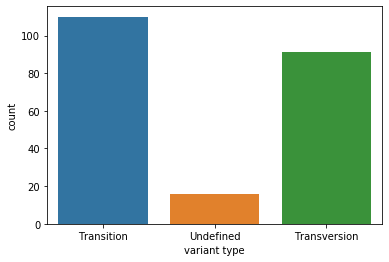

In [21]:
sns.countplot(variant_df['variant type'])

In [22]:
import mplh.cluster_help as ch

In [23]:
cell_meta = pd.DataFrame(index=AF_df.columns, data={"Condition": AF_df.columns.map(samples_d),
                                               "Donor": AF_df.columns.map(donors_d)})
cell_meta

,Condition,Donor
Cell,,
8,Control,0
9,Control,0
15,Control,0
17,Control,0
20,Control,0
...,...,...
6341,Input,4
6343,Input,4
6349,Input,4


In [24]:
variants_meta=variant_df.set_index("ID").loc[AF_df.index]
variants_meta

,position,ref,alt,variant type,variant change
Variant,,,,,
3,248,N,G,Undefined,N>G
4,277,N,A,Undefined,N>A
5,280,N,A,Undefined,N>A
6,291,A,T,Transversion,A>T
7,297,A,C,Transversion,A>C
...,...,...,...,...,...
212,13435,C,G,Transversion,C>G
213,13814,T,G,Transversion,T>G
214,13823,T,A,Transversion,T>A


clustering
cmap None


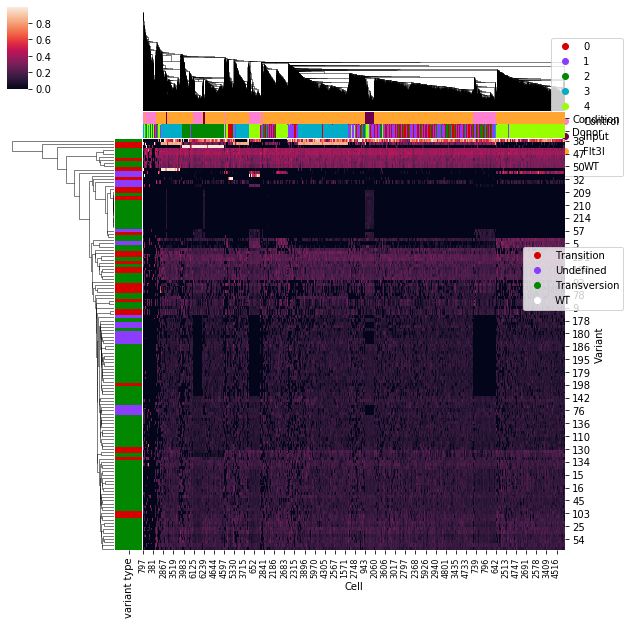

In [33]:
%matplotlib inline
ch.plot_cluster(np.sqrt(AF_df), row_meta=variant_df.set_index("ID")[['variant type']], col_meta=cell_meta)

In [26]:
AF_df

Cell,8,9,15,17,20,22,32,34,37,39,...,6300,6305,6309,6316,6332,6341,6343,6349,6350,6362
Variant,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.002793,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002020,0.0,0.000000,0.0,0.000000,0.000000,0.003384,0.000904,0.002837,0.008505,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.006316,0.0,0.000000,0.0,0.000000,0.000000,0.000851,0.001764,0.005666,0.009662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.009828,0.0,0.000000,0.0,0.000000,0.000000,0.002669,0.001903,0.004504,0.021333,...,0.051752,0.049211,0.062264,0.055524,0.063601,0.063506,0.053498,0.049000,0.063885,0.053103
7,0.007895,0.0,0.018181,0.0,0.055552,0.051281,0.015483,0.006836,0.019908,0.020325,...,0.051292,0.042241,0.045099,0.054396,0.065700,0.046491,0.040540,0.065714,0.039467,0.074097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007120,0.007795,0.018053,0.009581,0.001880,0.010773,0.009302,0.015750,0.022731,0.006596
213,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010541,0.014093,0.008885,0.015051,0.008214,0.010386,0.010840,0.006544,0.014085,0.006731
214,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008477,0.012800,0.009947,0.009877,0.006512,0.005291,0.007947,0.010536,0.012735,0.009782


In [27]:
def variants_dense(AF_df, vars_to_plot):
    var_sort = AF_df.mean(axis=1).argsort()
    variants_box=AF_df.loc[var_sort.values[:vars_to_plot]].reset_index().melt(id_vars='Variant', 
                                                                              value_name='AF')
    variants_box['Sample'] = variants_box['Cell'].map(samples_d)
    variants_box['Donor'] = variants_box['Cell'].map(donors_d)
    #variants_box=variants_box.dropna().copy()
    variants_box['sqrtAF'] = np.sqrt(variants_box['AF'])
    return variants_box

In [28]:
var_sort = AF_df.mean(axis=1).argsort()
variants_box=AF_df.loc[var_sort.values[:vars_to_plot]]#.reset_index().melt(id_vars='Variant', 
                                                       #                   value_name='AF')


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


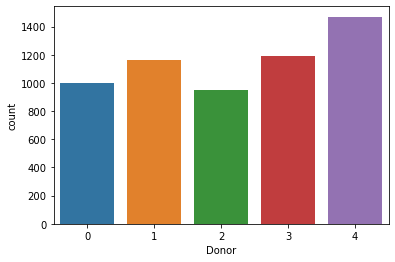

In [29]:
sns.countplot(cell_meta["Donor"].fillna(-1))

In [30]:
variants_box=variants_dense(AF_df.loc[high_vars], vars_to_plot)

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


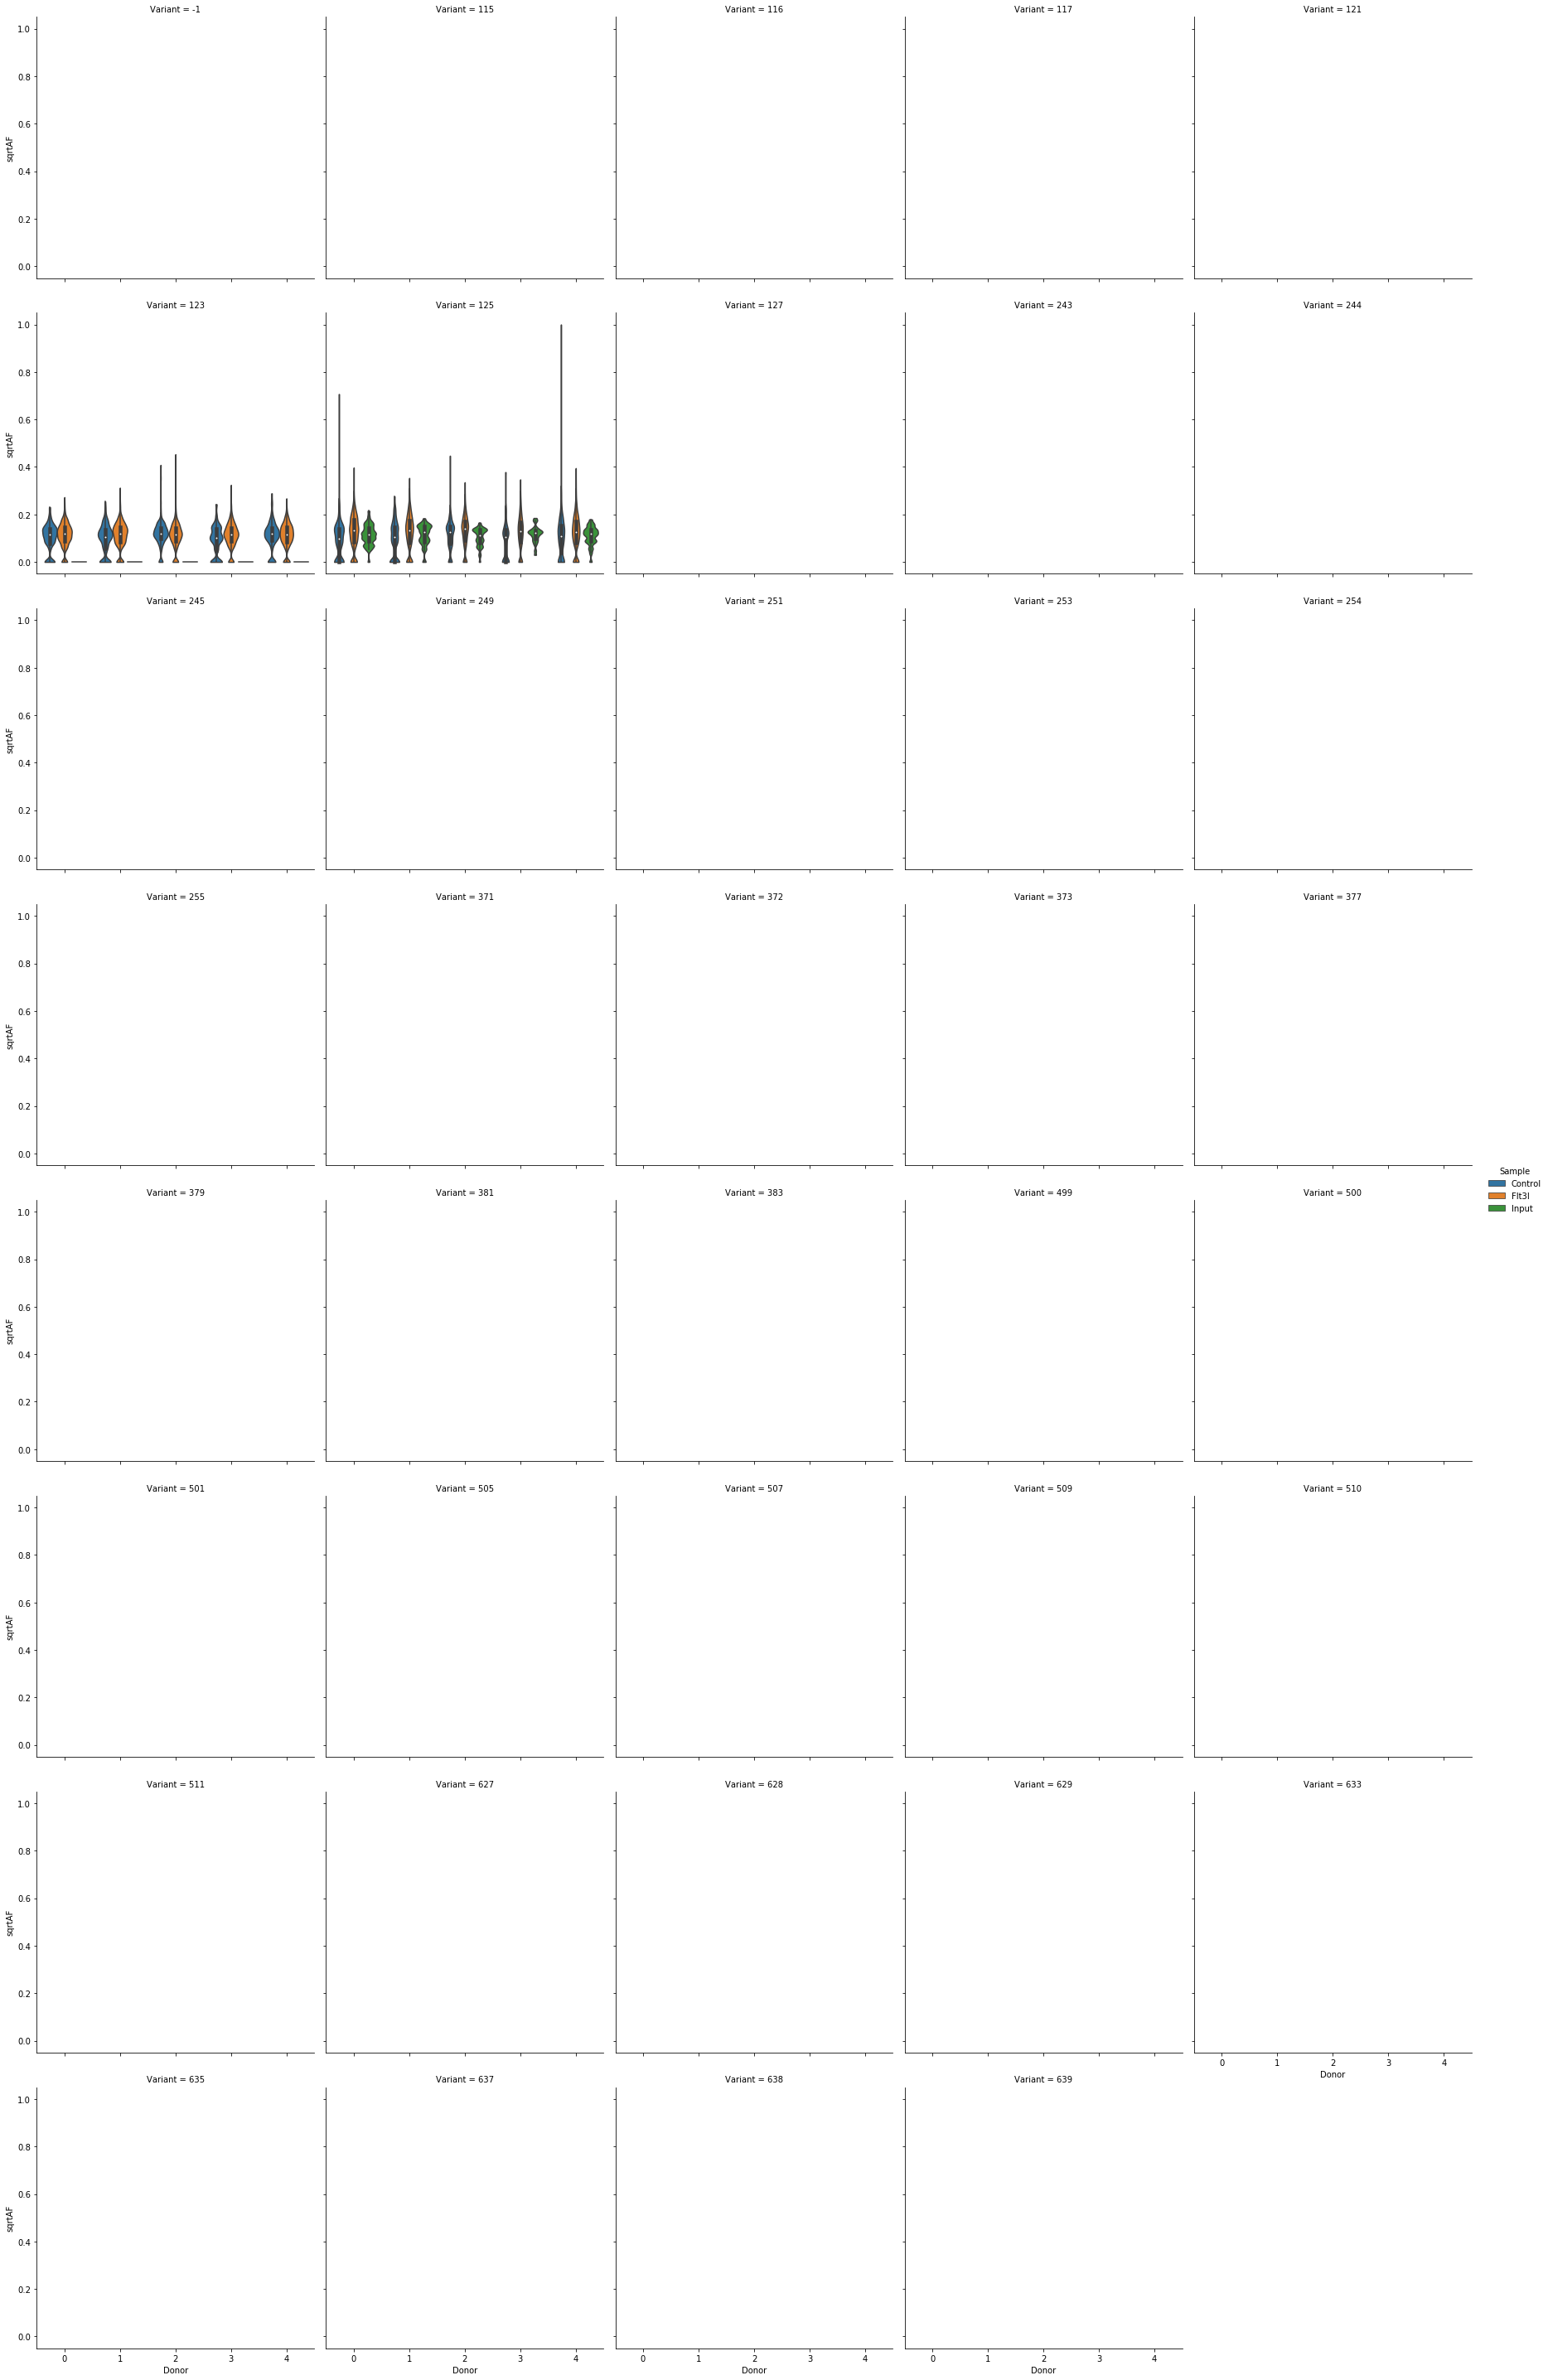

In [31]:
%matplotlib inline
g = sns.catplot(x='Donor', y='sqrtAF', 
                hue='Sample', col='Variant',col_wrap=5, 
                data=variants_box, 
                kind="violin", dodge=True, cut=0, bw=.2)
plt.savefig(out_f)

## Condition on Transitions

Transition


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """


Transversion
Undefined


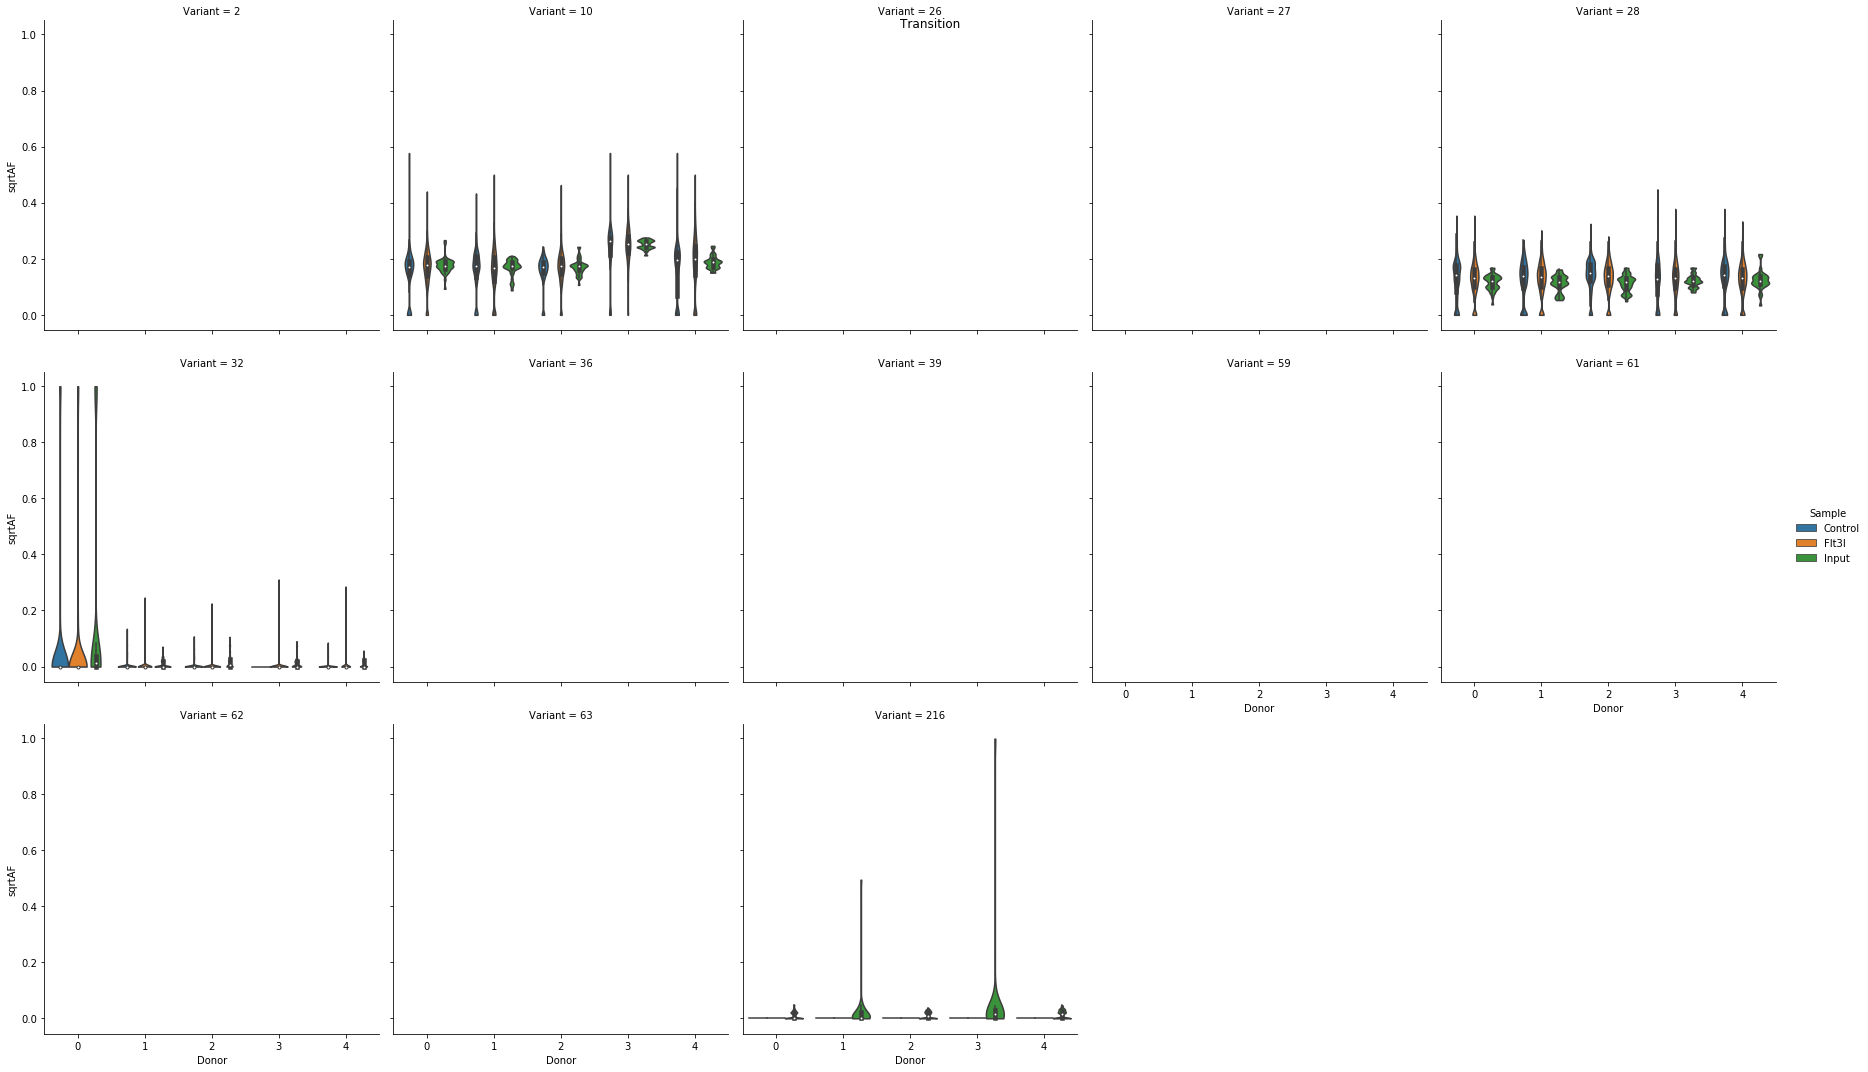

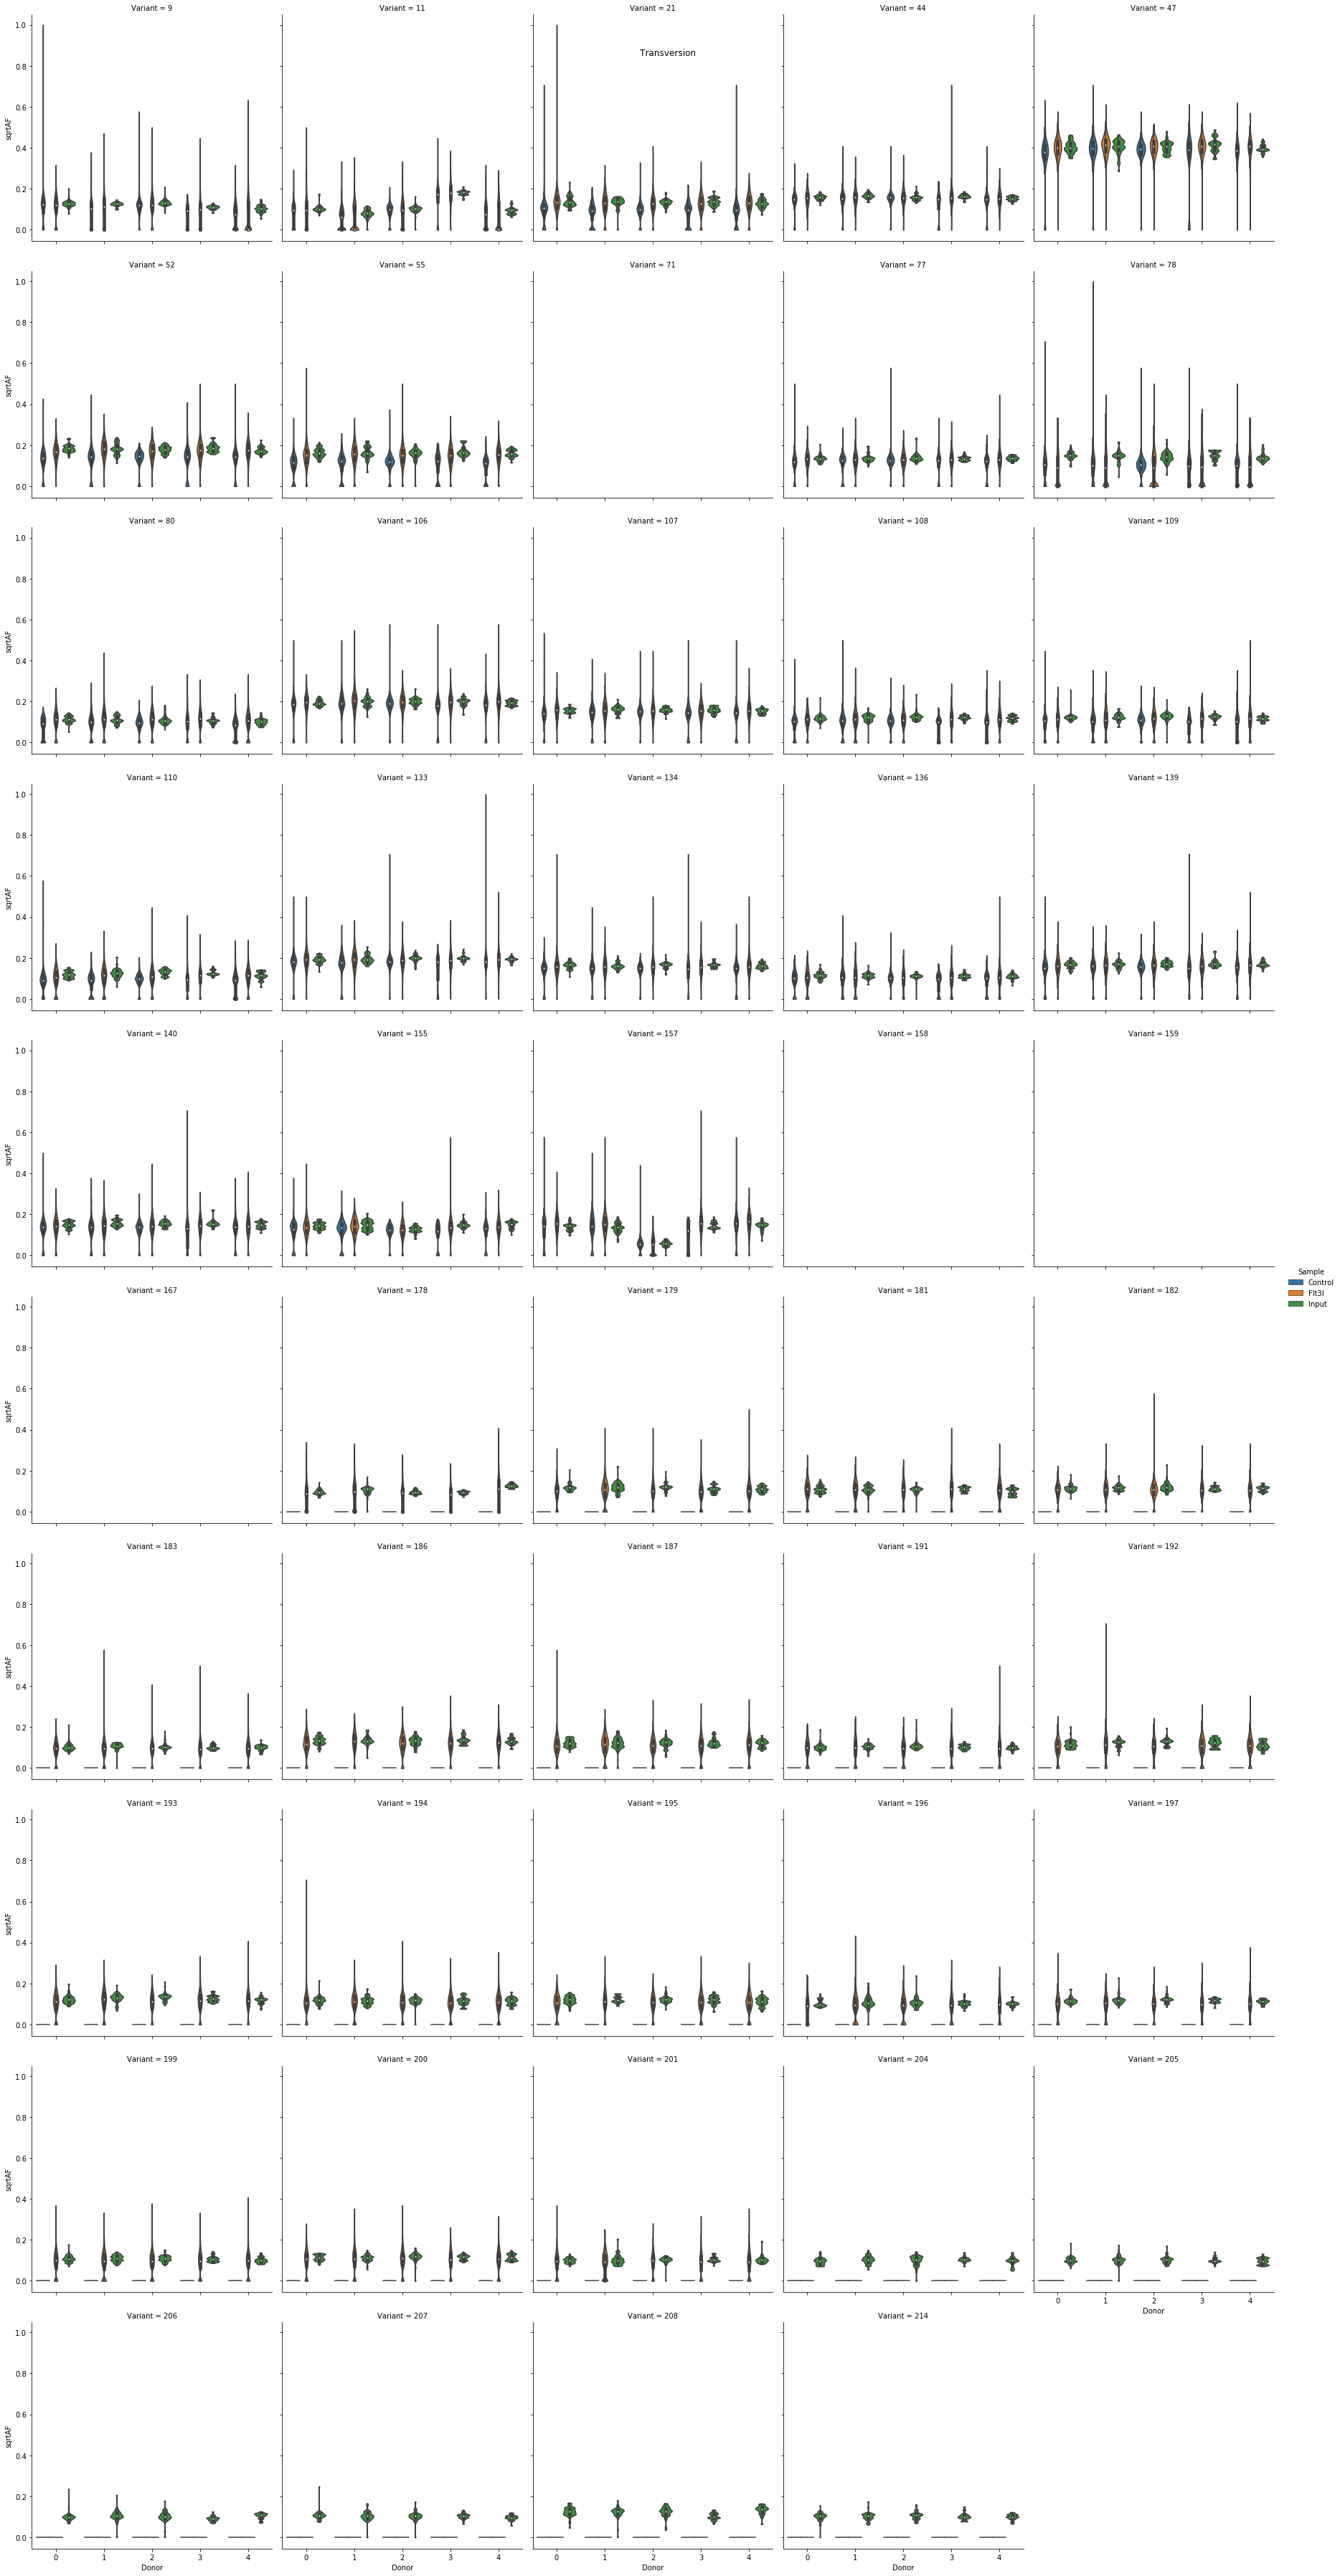

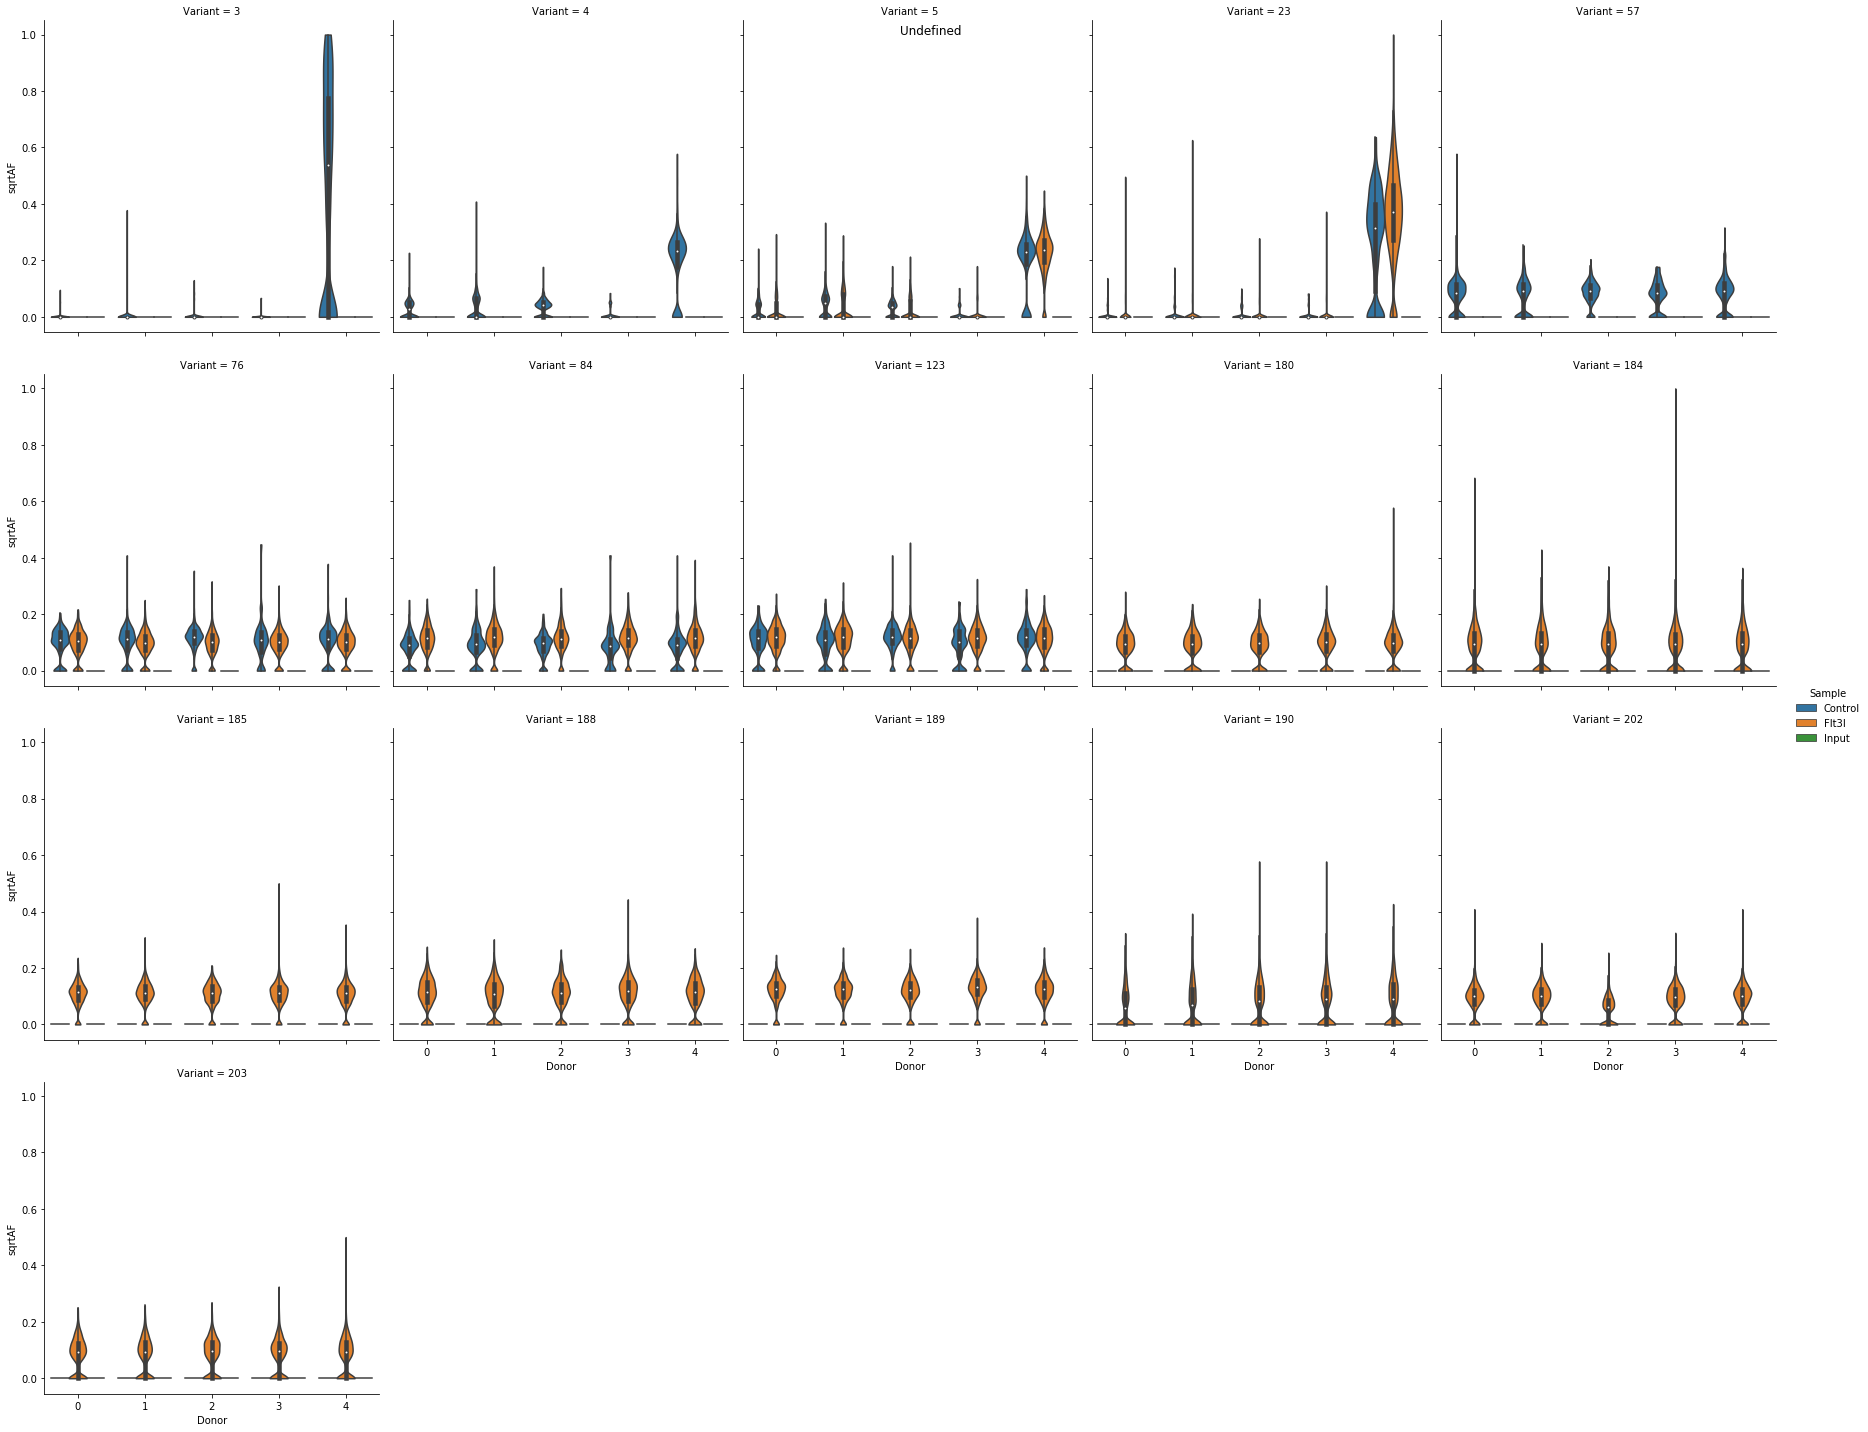

In [32]:
%matplotlib inline
for var_t, val in (variant_df.groupby('variant type')):
    print(var_t)
    #variants_box=variants_dense(curr_af.loc[val["ID"].values], 10)
    curr_af = AF_df.loc[val['ID']]
    var_sort = curr_af.mean(axis=1).argsort()
    variants_box=curr_af.iloc[var_sort.values[:vars_to_plot]].reset_index().melt(id_vars='Variant', 
                                                                              value_name='AF')
    variants_box['Sample'] = variants_box['Cell'].map(samples_d)
    variants_box['Donor'] = variants_box['Cell'].map(donors_d)
    #variants_box=variants_box.dropna().copy()
    variants_box['sqrtAF'] = np.sqrt(variants_box['AF'])
    
    g = sns.catplot(x='Donor', y='sqrtAF', 
                    hue='Sample', col='Variant',col_wrap=5, 
                    data=variants_box, 
                    kind="violin", dodge=True, cut=0, bw=.2)
    plt.suptitle(var_t)
    plt.savefig(out_f.replace('.png','')+f'.varType{var_t}.png') 